### Problem 1: SVM Classification

`lab01_dataset_1.xlsx` contains the claim history of 27,513 homeowner policies. The following table describes the eleven columns in the dataset.

| Name | Description |
| --- | --- |
| policy | Policy Identifier |
| exposure | Duration a Policy exposed in a Year |
| num_claims | Number of Claims in a Year |
| amt_claims | Total Claim Amount in a Year	|
| f_primary_age_tier | Age Tier of Primary Insured |
| f_primary_gender | Gender of Primary Insured |
| f_marital | Marital Status of Primary Insured |
| f_residence_location | Location of Residence Property |
| f_fire_alarm_type | Fire Alarm Type |
| f_mile_fire_station | Distance to Nearest Fire Station |
| f_aoi_tier | Amount of Insurance Tier |

We want to predict the *Frequency* which is the *number of claims per unit of exposure* using the above features.  We first divide the reported number of claims by the exposure. This gives us the *Frequency*.  Next, we put the policies into five groups according to their *Frequency* values. We will use this *Group* as our target variable which has five classes.

| Group | Values |
| :--- | :--- |
| 0 | Frequency = 0 |
| 1 | 0 < Frequency <= 1 |
| 2 | 1 < Frequency <= 2 |
| 3 | 2 < Frequency <= 3 |
| 4 | 3 < Frequency |


### 1.a
Create a new column for the dataset which will indiciate the *Frequency Group* and output the updated dataset.

In [ ]:
# import pandas
import pandas as pd

# input file
file_path = "lab01_dataset_1-1.xlsx"
as1 = pd.read_excel(file_path) # as1: "assignment1"

# add new column "frequency"
# do the calculation: frequency = num_claims / exposure
as1["Frequency"] = as1["num_claims"] / as1["exposure"]


# set up new method "categorize_frequency"
def categorize_frequency(value):
    if value == 0:
        return 0
    elif value <= 1:
        return 1
    elif value <= 2:
        return 2
    elif value <= 3:
        return 3
    else:
        return 4

# apply method to new column "Frequency Group"
as1["Frequency Group"]= as1["Frequency"].apply(categorize_frequency) # .apply(method) to apply new method

# print the result
#print(as1.head())

# update the Excel file
as1.to_excel("lab01_dataset_1-1.xlsx", index=False)

### 1.b
There are seven categorial features in the dataset namely, *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location*. Display all the unique values of these seven categories.

In [ ]:
# input file
file_path = "lab01_dataset_1-1.xlsx"
as1 = pd.read_excel(file_path) # as1: "assignment1"

# put all features in a list
feature_category = [
    "f_aoi_tier",
    "f_primary_age_tier",
    "f_fire_alarm_type",
    "f_marital",
    "f_mile_fire_station",
    "f_primary_gender",
    "f_residence_location"
]

# print all unique values
for feature in feature_category:
    unique_values = as1[feature].unique() # .unique() return the unique value
    print(f"Unique Values in '{feature}':") #f " '{feature}' " replace the feature and print
    print(unique_values)
    print("\n")  # Add space

Unique Values in 'f_aoi_tier':
['351K - 600K' '< 100K' '100K - 350K' '601K - 1M' '> 1M']


Unique Values in 'f_primary_age_tier':
['21 - 27' '38 - 60' '28 - 37' '> 60' '< 21']


Unique Values in 'f_fire_alarm_type':
['Alarm Service' nan 'Standalone']


Unique Values in 'f_marital':
['Married' 'Un-Married' 'Not Married']


Unique Values in 'f_mile_fire_station':
['< 1 mile' '1 - 5 miles' '> 10 miles' '6 - 10 miles']


Unique Values in 'f_primary_gender':
['Male' 'Female']


Unique Values in 'f_residence_location':
['Urban' 'Suburban' 'Rural']




### 1.c
We will train SVM models using those seven categorical features. However, their values are currently all categorical data, but SVM requires them to be numerical. Perform ***one-hot encoding*** on these features to obtain an updated dataset which has only numerical values.

In [ ]:
# input file
file_path = "lab01_dataset_1-1.xlsx"
as1 = pd.read_excel(file_path) # as1: "assignment1"

# one-hot encoding on the "feature_category" (which is the feature list from 1.b)
as1_encoded = pd.get_dummies(as1, columns=feature_category, dtype='int')
    # .get_dummies do one-hot encoding on the specified columns
    # columns parameter takes a list of column names to be encoded
    # dtype makes the datatype 1/o which is encoded as well


# print the updated dataset
print(as1_encoded.head())

# updat Excel file
as1_encoded.to_excel("lab01_dataset_1-1.xlsx", index=False)

   policy  exposure  num_claims  amt_claims  Frequency  Frequency Group  \
0  P00001       1.0           0        0.00        0.0                0   
1  G00002       1.0           0        0.00        0.0                0   
2  A00003       1.0           2     3079.01        2.0                2   
3  P00004       1.0           1      804.87        1.0                1   
4  G00005       1.0           1      638.74        1.0                1   

   f_aoi_tier_100K - 350K  f_aoi_tier_351K - 600K  f_aoi_tier_601K - 1M  \
0                       0                       1                     0   
1                       0                       0                     0   
2                       1                       0                     0   
3                       0                       0                     0   
4                       1                       0                     0   

   f_aoi_tier_< 100K  ...  f_marital_Un-Married  \
0                  0  ...                     0

### 1.d
Divide the observations into training and testing partitions. Observations whose *Policy Identifier* starts with the letters A, G, and P will go to the training partition. The remaining observations go to the testing partition. Output the total number of policies present in the Training partition and Testing partition.

In [ ]:
# input file
file_path = "lab01_dataset_1-1.xlsx"

# set up new method "categorize_partition"
def categorize_partition(value):
    if str(value).startswith("A"): # Training partition
        return 0
    elif str(value).startswith("G"): # Training partition
        return 0
    elif str(value).startswith("P"): # Training partition
        return 0
    else:
        return 1  # Testing partition

# call as1_encoded to use the encoded data
# categorize based on the condition
as1_encoded["partition"] = as1_encoded["policy"].apply(categorize_partition)

# calculate the total count of Training & Testing partition
partition_counts = as1_encoded["partition"].value_counts()

# set up mapping for partition labels
partition_labels = {0: "Training partition", 1: "Testing partition"}

# print total number of policies in Training partition and Testing partition
for key, count in partition_counts.items():
    print(f"{partition_labels[key]}: {count}")

# save the updated DataFrame to a new Excel file
as1_encoded.to_excel("lab01_dataset_1-1.xlsx", index=False)

Training partition: 20661
Testing partition: 6852


### 1.e
Train an SVM model using [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). The input features will be the encoded version of the feature set *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location* and the output is the *Frequency Group*. Use `verbose=1` to observe the optimization steps during the training process.

In [ ]:
from sklearn.svm import LinearSVC

# input file
file_path = "lab01_dataset_1-1.xlsx"

# define the input features (encoded features)
input_features = [
    'f_aoi_tier_100K - 350K', 'f_aoi_tier_351K - 600K', 'f_aoi_tier_601K - 1M', 'f_aoi_tier_< 100K', 'f_aoi_tier_> 1M',
    'f_primary_age_tier_21 - 27', 'f_primary_age_tier_28 - 37', 'f_primary_age_tier_38 - 60', 'f_primary_age_tier_< 21', 'f_primary_age_tier_> 60',
    'f_fire_alarm_type_Alarm Service', 'f_fire_alarm_type_Standalone',
    'f_marital_Married', 'f_marital_Not Married', 'f_marital_Un-Married',
    'f_mile_fire_station_1 - 5 miles', 'f_mile_fire_station_6 - 10 miles', 'f_mile_fire_station_< 1 mile', 'f_mile_fire_station_> 10 miles',
    'f_primary_gender_Female', 'f_primary_gender_Male',
    'f_residence_location_Rural', 'f_residence_location_Suburban', 'f_residence_location_Urban'
]

# define the target feature (variable)
target = 'Frequency Group'

# call as1_encoded to use the encoded data
# prepare the training & testing data based on 'partition' column
X_train = as1_encoded[as1_encoded['partition'] == 0][input_features]
y_train = as1_encoded[as1_encoded['partition'] == 0][target]
X_test = as1_encoded[as1_encoded['partition'] == 1][input_features]
y_test = as1_encoded[as1_encoded['partition'] == 1][target]

# use verbose=1 to observe the optimization steps during the training process
model = LinearSVC(verbose=1)

# train the model
model.fit(X_train, y_train)

/Users/mbp/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]...................
optimization finished, #iter = 193
Objective value = -19557.395337
nSV = 20661
...................
optimization finished, #iter = 192
Objective value = -15631.233287
nSV = 20661
..................*.............*
optimization finished, #iter = 312
Objective value = -8430.330167
nSV = 20659
..................*...........*
optimization finished, #iter = 292
Objective value = -2643.325796
nSV = 20317
..................*...........**
optimization finished, #iter = 297
Objective value = -3507.376215
nSV = 20569


LinearSVC(verbose=1)

### 1.f
Compute and output the Accuracy Score on the Testing partition.

In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the test set
y_pred = model.predict(X_test)

# compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f"Accuracy Score on the Testing partition: {accuracy * 100:.4f}%")

Accuracy Score on the Testing partition: 56.3485%


### Problem 2: Perceptron Learning

The dataset `lab01_dataset_2.csv` has a *3-dimensional input space* and a class label of *Positive* and *Negative*. For this task, you are **not allowed** to use any *functionalities* of the `sklearn` module.

### 2.a
Write a function `my_perceptron()` which applies the perceptron algorithm (refer to the lecture slide covering linear separators for details of this algorithm) on the dataset to create a linear separator. `my_perceptron()` takes the dataset as its input and returns a ***3-dimensional weight vector*** which can be used to create the linear separator (assume `bias = 0`). Use the *initial weights* `w = [1,2,3]`. Use a classification threshold of `99%` i.e., `my_perceptron()` will terminate once the misclassification rate is less than `1%`.

In [ ]:
import numpy as np
import pandas as pd

def my_perceptron(dataset_path, w):
    # input file
    as1 = pd.read_csv(dataset_path)

    # input the data as inputs = ['X', 'Y', 'Z'], labels = "Class"
    inputs = as1[["X", "Y", "Z"]].values
    labels = as1["Class"].values

    # input the initial weight vector w
    W = np.array(w)

    # Training loop
    n_samples = len(labels) # total sample count
    accuracy = 0

    while accuracy < 0.99: # set up as threshold request
        misclassified_count = 0
        misclassified_input_num = None # prepare for start-over prediction

        for i in range(n_samples):
            # input the inputs & classes
            X = inputs[i]
            y_true = labels[i]

            # calculate the dot product of W.X
            Result = np.dot(W, X)

            # define the prediction based on Result
            prediction_label = "Positive" if Result >= 0 else "Negative"

            # print the current process
            print(f'{{{X.tolist()}, {prediction_label}, {y_true}}}')

            # check the prediction correctness
            if (Result >= 0 and y_true == "Negative") or (Result < 0 and y_true == "Positive"):
                # misclassification condition
                misclassified_count += 1
                misclassified_input_num = i

                # print the misclassified result and weight update
                print(f"\n====misclassified, input No. is: {misclassified_input_num + 1}=====")
                print(f'w = {W.tolist()} {"+" if y_true == "Positive" else "-"} {X.tolist()}', end="")

                # update the weights
                if y_true == "Positive":
                    # For the one should be positive class, update as W = W + X
                    W = W + X
                else:
                    # For the one should be negative class, update as W = W - X
                    W = W - X

                # print the updated weights
                print(f'  = {W.tolist()}')
                print("====w updated, go on with next input====\n")


        # If go through entire dataset without misclassification, accuracy is 100%
        if misclassified_count == 0:
            accuracy = 1.0
        else:
            # If not, continue checking from the beginning to the misclassified input
            print("\n====iteration ended, start from begining to the misclassified input ====\n")
            for j in range(misclassified_input_num + 1):
                X = inputs[j]
                y_true = labels[j]

                Result = np.dot(W, X)

                prediction_label = 'Positive' if Result >= 0 else 'Negative'
                y_true_label = 'Positive' if y_true == 1 else 'Negative'

                print(f'{{{X.tolist()}, {prediction_label}, {y_true_label}}}')

                if (Result >= 0 and y_true == "Negative") or (Result < 0 and y_true == "Positive"):
                    misclassified_count += 1
                    print(f"\n====misclassified in revisit, input No. is: {j + 1}=====")
                    print(f'w = {W.tolist()} {"+" if y_true == "Positive" else "-"} {X.tolist()}', end="")

                    if y_true == 1:
                        W = W + X
                    else:
                        W = W - X

                    print(f'  = {W.tolist()}')

            # calculate accuracy and update, treminates if >= 0.99
            accuracy = (n_samples - misclassified_count) / n_samples

    return W

# Example usage:
initial_weights = [1.0, 2.0, 3.0]
weight_vector = my_perceptron('lab01_dataset_2.csv', initial_weights)
print(f'\nFinal weight vector: {weight_vector}')

{[-2.1532692805177787, -1.910092197014788, -2.0892004499226653], Negative, Negative}
{[3.354634176163451, -1.8031991302651869, -2.8497887819604983], Negative, Negative}
{[-2.7735278065557267, 4.644997337348302, 2.4123745240813763], Positive, Positive}
{[2.8906077055746593, -1.1884941088777916, -1.7233884798999086], Negative, Negative}
{[-3.4166826996326605, 4.789794677243215, 3.157648952543675], Positive, Positive}
{[-2.8301345156910553, -2.0236622860584044, 0.5050977944618547], Negative, Negative}
{[3.245329021875462, -2.432022938986189, -1.9587366936215864], Negative, Negative}
{[-3.7173296158077673, 3.5102806361570016, 3.413532184163773], Positive, Positive}
{[-4.574160513280554, 3.0386129911676676, 0.1280936598346402], Positive, Positive}
{[-0.0650376257402038, 1.9456233084666097, 1.8073090250767123], Positive, Positive}
{[-1.6702409898579362, 2.160745673873259, 3.990518327167969], Positive, Positive}
{[0.862046760670526, 2.110341026057327, 1.272809367249894], Positive, Positive}
{

### 2.b
Create a *3D plot* which showcases the dataset in a 3D-space alongwith the *linear separator* you obtained from `my_perceptron()`. Use two different colors to represent the data points belonging in the two classes for ease of viewing.

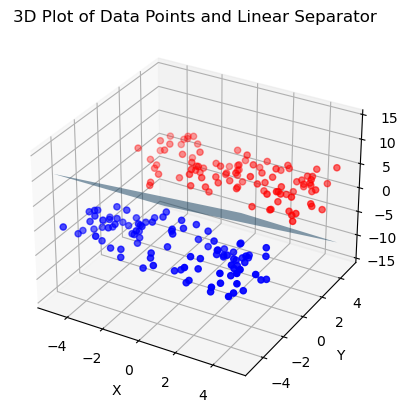

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# input file
as1 = pd.read_csv("lab01_dataset_2.csv")

# input the inputs & labels
inputs = as1[["X", "Y", "Z"]].values
labels = as1["Class"].values

# apply colors to different labels, red for Positive, blue for Negative
label_colors = np.where(labels == "Positive", "r", "b")

# Final weight vector from perceptron
W = np.array([-0.65363027, 5.5543439, 2.22143049])

# create a 3D plot by matplotlib
fig = plt.figure() # creates a new figure object, which is the container for all plot elements.
ax = fig.add_subplot(111, projection="3d") # add 3d subplot to figure, 111 means 1x1 grid, first subplot

# plot the data points
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], c=label_colors, marker='o')
    # inputs[:, 0] = x, inputs[:, 1] = y, inputs[:, 2] = z;
    # label_colors as mentioned above
    # shape of the plot markers, circle for here

# plot the linear separator
x = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 10) # generate the line space between, min & max, for x-axis
y = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 10) # generate the line space between, min & max, for y-axis
X, Y = np.meshgrid(x, y) # creates 2D-grid of x & y, and calculate Z values of the plane.

# arrange the plane equation z = -(W[0]*x + W[1]*y)/W[2]
Z = -(W[0] * X + W[1] * Y) / W[2]

# plot the linear separator plane
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)
    # alpha=0.5 transparentcy of the separator (min:0, max:1)
    # rstride=100, cstride=100: controls stride or size in rows and columns
    # higher values means lower resolution but better performance

# labels and plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Data Points and Linear Separator')

plt.show()